## Compare HCP subject: old vs. new maxLL estimation


Old maxLL estimation, I used `TrialType` as only aggregate variable and exclude `neutral` trials.

New maxLL estimation, I used `TrialType` and `BlockType` as aggregate variable, and include neutral trials.


In [1]:
import sys
import os
SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)
from simulate import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

main_dir = os.path.abspath(os.path.dirname(os.getcwd()))
subject_dir = 'data/simulation_2condition_include_neutral/subject_data'
main_dir, subject_dir

ACT-R connection has been started.


('/home/chery/Documents/Github/RLvIBL-Re',
 'data/simulation_2condition_include_neutral/subject_data')

## Load maxLL 

In [2]:
# combine maxLL
# save_model_classification(main_dir=main_dir, subject_dir=subject_dir)

In [3]:
df0 = pd.read_csv(os.path.join(main_dir, 'data/old_actr_maxLL.csv'))
df1 = pd.read_csv(os.path.join(main_dir, subject_dir, 'actr_maxLL.csv'), usecols=['HCPID', 'best_model', 'LL.m1', 'LL.m2', 'LL.diff']).drop_duplicates()
print('number of unique HCPID [%d], [%d]'% (len(df0.HCPID.unique()), len(df1.HCPID.unique())))

number of unique HCPID [199], [199]


In [4]:
df_compare = pd.merge(df0, df1, on='HCPID', suffixes=('.old', '.new'))

## MaxLL Distribution

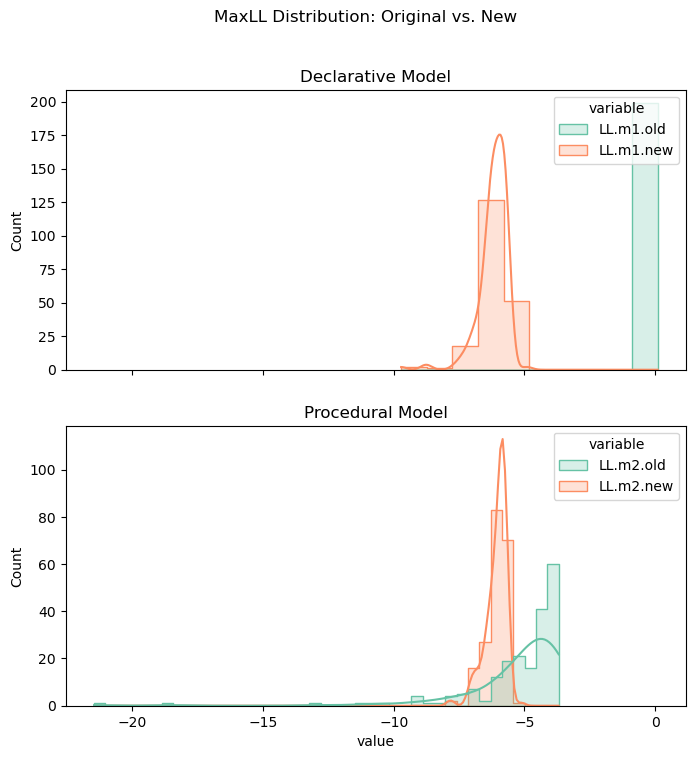

In [5]:
fig, axes = plt.subplots(2,1, figsize=(8,8), sharex=True)
fig.suptitle('MaxLL Distribution: Original vs. New')

sns.histplot(data = df_compare[['HCPID', 'LL.m1.old', 'LL.m1.new']].melt(id_vars='HCPID'), 
             x='value', hue='variable', kde=True, element='step', palette='Set2', ax=axes[0])
sns.histplot(data = df_compare[['HCPID', 'LL.m2.old', 'LL.m2.new']].melt(id_vars='HCPID'), 
             x='value', hue='variable', kde=True, element='step', palette='Set2',ax=axes[1])

axes[0].set_title('Declarative Model')
axes[1].set_title('Procedural Model')
plt.show()

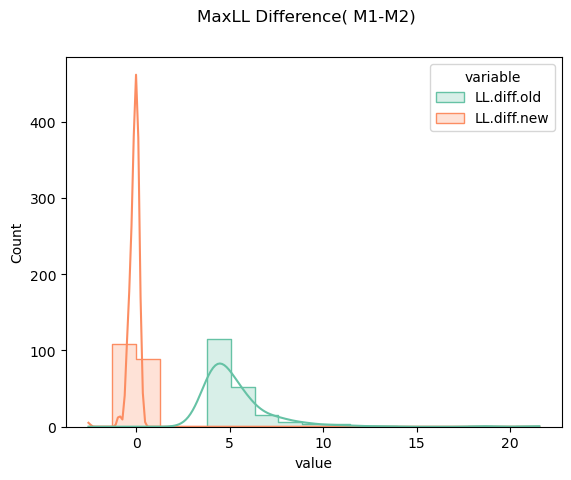

In [6]:
fig, ax = plt.subplots()
fig.suptitle('MaxLL Difference( M1-M2)')
ax = sns.histplot(data = df_compare[['HCPID', 'LL.diff.old', 'LL.diff.new']].melt(id_vars='HCPID'), 
                  x='value', hue='variable', kde=True, element='step', palette='Set2')
plt.show()

## Model Classification

Around 100 subjects -> same classfication

Around 100 misclassifications (old) m1 -> (new) m2

In [7]:
dfc = confusion_matrix(df_compare, 'best_model.old', 'best_model.new')

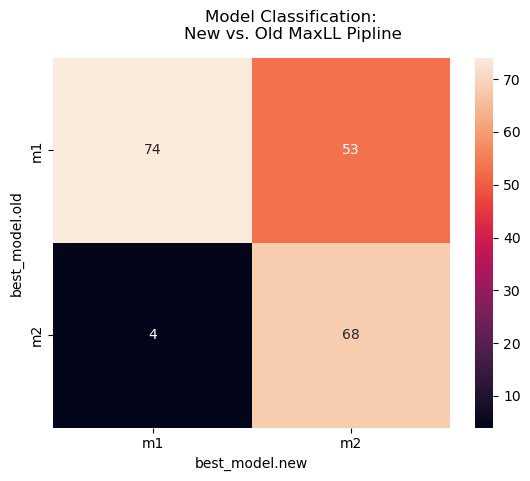

In [8]:
fig, ax = plt.subplots()
fig.suptitle('Model Classification: \nNew vs. Old MaxLL Pipline')
ax = sns.heatmap(dfc,annot=True)
plt.show()

## PSwitch Pattern

Next, let's see how model classification in original vs. new maxLL affects behaviral pattern (PSwitch)

Main Takeaway: original and new model classification results show very **similar** pattern. We might not need to redo fmri network analysis (?)

In [9]:
df_subject_agg = pd.concat([pd.read_csv(f, index_col=0) for f in glob.glob(os.path.join(main_dir, subject_dir, '*', 'aggregate', 'subject-agg.csv'))], axis=0)
df_model_class = df_compare[['HCPID', 'best_model.old', 'best_model.new']]#.melt(id_vars='HCPID', var_name='maxLL_pipline', value_name='model_class')

# merge 
df_subject_agg = pd.merge(df_subject_agg, df_model_class, on='HCPID')

# order
df_subject_agg['TrialType'] = pd.Categorical(df_subject_agg['TrialType'], categories=["Reward", "Punishment", "Neutral"], ordered=True)
df_subject_agg.head()

,HCPID,BlockType,TrialType,ResponseSwitch,best_model.old,best_model.new
0,110411_fnca,MostlyPunishment,Neutral,0.000000,m1,m1
1,110411_fnca,MostlyPunishment,Punishment,0.250000,m1,m1
2,110411_fnca,MostlyPunishment,Reward,0.400000,m1,m1
3,110411_fnca,MostlyReward,Neutral,0.666667,m1,m1
4,110411_fnca,MostlyReward,Punishment,0.400000,m1,m1


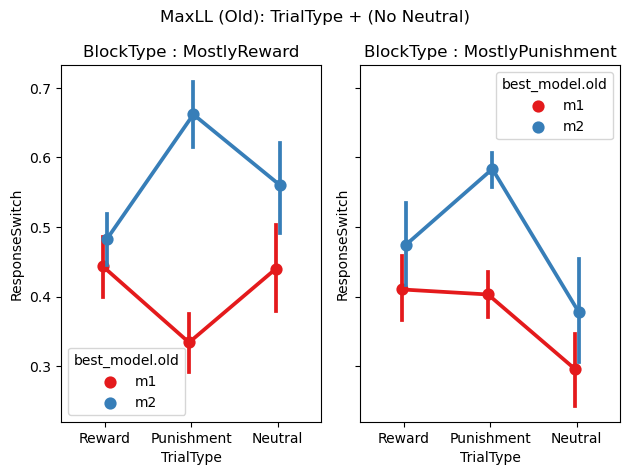

In [10]:
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)
fig.suptitle('MaxLL (Old): TrialType + (No Neutral)')
sns.pointplot(data = df_subject_agg[df_subject_agg['BlockType']=='MostlyReward'], x='TrialType', y='ResponseSwitch', hue='best_model.old', dodge=True, palette='Set1', ax=axes[0])
sns.pointplot(data = df_subject_agg[df_subject_agg['BlockType']!='MostlyReward'], x='TrialType', y='ResponseSwitch', hue='best_model.old', dodge=True, palette='Set1', ax=axes[1])
axes[0].set_title('BlockType : MostlyReward')
axes[1].set_title('BlockType : MostlyPunishment')
plt.tight_layout()
plt.show()

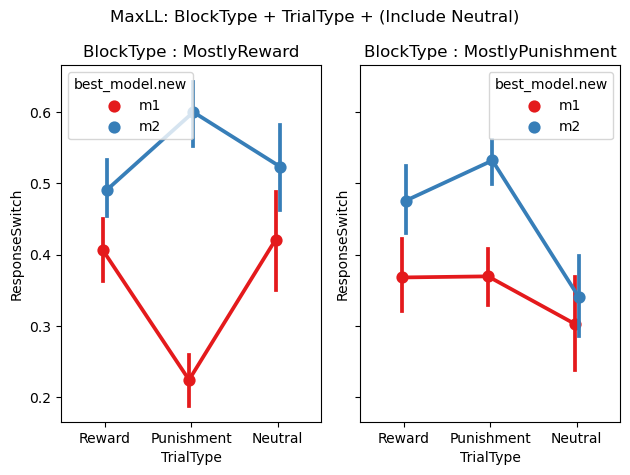

In [11]:
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)
fig.suptitle('MaxLL: BlockType + TrialType + (Include Neutral)')
sns.pointplot(data = df_subject_agg[df_subject_agg['BlockType']=='MostlyReward'], x='TrialType', y='ResponseSwitch', dodge=True, palette='Set1', hue='best_model.new', ax=axes[0])
sns.pointplot(data = df_subject_agg[df_subject_agg['BlockType']!='MostlyReward'], x='TrialType', y='ResponseSwitch', dodge=True, palette='Set1', hue='best_model.new', ax=axes[1])
axes[0].set_title('BlockType : MostlyReward')
axes[1].set_title('BlockType : MostlyPunishment')
plt.tight_layout()
plt.show()